In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pmdarima.arima import auto_arima
from datetime import datetime
import matplotlib.pyplot as plt
import tsfresh
from pmdarima.arima import ADFTest
from tsfresh import extract_features
from statsmodels.tsa.arima.model import ARIMA

In [2]:
values = read_csv("../../Electric_Production.csv")

In [3]:
values['DATE'] = pd.to_datetime(
    values['DATE'], errors='coerce')
values = values.rename(columns={'DATE': 'Time'})
values = values.rename(columns={'IPG2211A2N': 'Data'})

In [4]:
values.set_index('Time', inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    values, test_size=0.2, shuffle=False)

In [6]:
model = ARIMA( train, exog=None, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), 
              trend=None, enforce_stationarity=False, enforce_invertibility=True, 
              concentrate_scale=False, trend_offset=1, dates=None, freq=None, 
              missing='none', validate_specification=False)
model_fit = model.fit() 
model_fit.summary()

c:\Users\haman\anaconda3\envs\doan\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\haman\anaconda3\envs\doan\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\haman\anaconda3\envs\doan\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             Data   No. Observations:                  317
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -645.885
Date:                          Wed, 21 Jun 2023   AIC                           1301.771
Time:                                  13:29:17   BIC                           1320.120
Sample:                              01-01-1985   HQIC                          1309.123
                                   - 05-01-2011                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5041      0.061      8.278      0.000       0.385       0.623
ma.L1         -0.9536      0.021    -45.800      0.000      -0.994      -0.913
ar.S.L12   -1.458e-05      0.032     -0.000      1.000      -0.062       0.062
ma.S.L12      -0.7102      0.051    -13.854      0.000      -0.811      -0.610
sigma2         4.9540      0.325     15.266      0.000       4.318       5.590
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                30.35
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
n_periods = test.shape[0]

In [8]:
predicted = model_fit.forecast(n_periods)

In [9]:
predicted

2011-06-01    102.019417
2011-07-01    110.239855
2011-08-01    111.262431
2011-09-01     99.904243
2011-10-01     92.006699
                 ...    
2017-09-01    104.804777
2017-10-01     96.863002
2017-11-01     98.974203
2017-12-01    116.691634
2018-01-01    123.307521
Freq: MS, Name: predicted_mean, Length: 80, dtype: float64

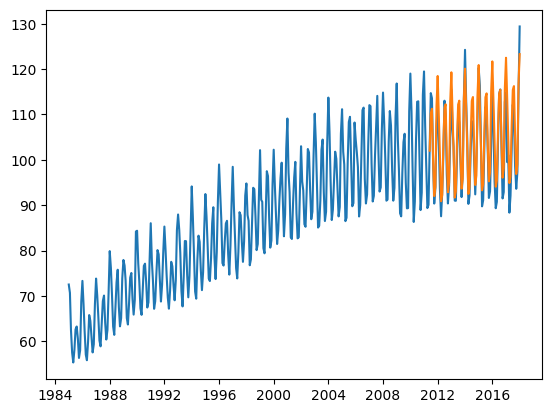

In [10]:
plt.plot(values.index,values['Data'])
plt.plot(test.index,predicted)